In [1]:
import pickle
import numpy as np

## This pickle was made by using `picture_retrival.py` with function `read_pic_from_path(path)`

### warning every file you load need to be with out any **space**

``` bash
for oldname in *
do
  newname=`echo $oldname | sed -e 's/ /_/g'`
  mv "$oldname" "$newname"
done
```

> write in advance, I use above bash script to rename all file

In [2]:
LOADED = False
if LOADED:
    pickle_in = open('/Volumes/ExternalSSDForMac/AITLecture/CSforDSAIAUG22/_project_cp_22/plant_village_img_cls/leavesVillagePickle.atikeep','rb')

    tupletest = pickle.load(pickle_in)



In [3]:
if LOADED:
    tupletest[0][0].shape
# 256,256,3

### Great Greate Anakin Greate haha 

In [4]:
# X_list,y_list = tupletest

In [5]:
# y = np.array(y_list)
# np.unique(y)

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Background_without_leaves', 'Blueberry___healthy',
       'Cherry___Powdery_mildew', 'Cherry___healthy',
       'Corn___Cercospora_leaf_spot_Gray_leaf_spot', 'Corn___Common_rust',
       'Corn___Northern_Leaf_Blight', 'Corn___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
       'Tomato___Leaf_Mold', 'Tomato___Septoria_

In [6]:
# y.shape

(61486,)

In [7]:
# len(X_list)

61486

In [8]:
# X_list[0].shape

(256, 256, 3)

In [9]:
# X_list[1].shape

(204, 204, 3)

### Seem like my data loading work just fine

# TODO
- maybe crop the data to be the same size since it now work properly with `numpy array` since the shape is missmatch
- try to use deep lake to lode data since it more portable there
- study `torch` more 


### LAb to day try img at home at 64* 64 size img

In [24]:
import cv2
import matplotlib.pyplot as plt

In [13]:
HEGIHT_IMG = 64
WEIGHT_IMG = 64

In [18]:
def batch_img_cropper(list_of_img,label_each_img,h,w):
    X_list_resize = []
    y_list_counter = []
    for img,label in zip(list_of_img,label_each_img):
        img_res = cv2.resize(img,(h,w))
        if img_res is not None:
            X_list_resize.append(img_res)
            y_list_counter.append(label)
    if len(X_list_resize) == len(y_list_counter):
        return (X_list_resize,y_list_counter)

    

In [19]:
# X_list_64,y_list_64 = batch_img_cropper(X_list,y_list,HEGIHT_IMG,WEIGHT_IMG)

In [20]:
# X_list_64[0].shape

(64, 64, 3)

In [21]:
# len(X_list_64)

61486

In [22]:
# X_array_64 = np.array(X_list_64) 

In [27]:
# y_array_64 = np.array(y_list_64)
# type(X_array_64),X_array_64.shape

(numpy.ndarray, (61486, 64, 64, 3))

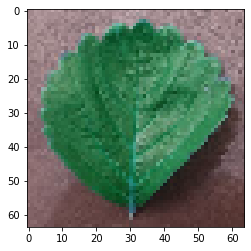

['Strawberry___healthy' 'Strawberry___healthy' 'Strawberry___healthy' ...
 'Soybean___healthy' 'Soybean___healthy' 'Soybean___healthy']


In [32]:
plt.imshow(X_array_64[0],interpolation='nearest')
plt.show()
print(y_array_64)

### thus, now we have X_array_64 and y_array_64
### we are going to save this as pickle and split for train and **REAL TEST** dataset

In [30]:
# to_dump_64 = (X_array_64,y_array_64) 
# with open('data_img_64_nparray.atikeep', 'wb') as handle:
#     pickle.dump(to_dump_64, handle)

# with open('data_img_64_nparray.atikeep', 'rb') as handle:
#     to_check = pickle.load(handle)

# to_check[0].shape



(61486, 64, 64, 3)

In [40]:
with open('data_img_64_nparray.atikeep', 'rb') as handle:
    X_arr_64,y_arr_64 = pickle.load(handle)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
RANDOM_STATE = 112

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_arr_64, y_arr_64, test_size=0.30, random_state=112)


In [44]:
with open('test_only_64_nparray.atikeep', 'wb') as handle:
    pickle.dump((X_test,y_test), handle)

In [45]:
with open('train_64_nparray.atikeep', 'wb') as handle:
    pickle.dump((X_train,y_train), handle)

In [46]:
X_train.shape

(43040, 64, 64, 3)

In [47]:
y_train.shape

(43040,)